<h2><b>Nama : Victory Herawidatama Esa Putra</b></h2>
<h3><b> Email : 18101105@ittelkom-pwt.ac.id </b></h3>




**Install library kaggle dikarenakan menggunakan dataset dari kaggle yang sudah di split train 80 dan test 20**
<p><b>Link dataset : https://www.kaggle.com/puneet6060/intel-image-classification/ </b></p>
<p><b>Dan membuat fungsi upload untuk api kaggle.json nantinya</b></p>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victoryherawidatama","key":"576e06ab44d4c99dacdf3e45506218c8"}'}

**Proses membuat directory untuk menampung file kaggle.json pada server**

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list  #Test koneksi kaggle dari google colab

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-09-18 20:49:48          12534  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7600  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3214  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1413  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

**Proses Download dataset dari kaggle**

In [3]:
! kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:07<00:00, 66.0MB/s]
100% 346M/346M [00:07<00:00, 47.9MB/s]


**Import semua libraries yang dibutuhkan untuk proses classification**

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import zipfile,os
import pandas as pd
!pip install seedir #Instalasi seeder treeview
import seedir as sd

     |████████████████████████████████| 115 kB 4.0 MB/s 
     |████████████████████████████████| 185 kB 32.8 MB/s 
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=1654166580f17f42f227c7544e2ab3918b10364454ac9096021440d1a9269e6b
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully built emoji


**Buat directory 'data' untuk unzip file dataset yang sebelumnya sudah didownload**

In [6]:
! mkdir data
! unzip intel-image-classification.zip -d data

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: data/seg_train/seg_train/mountain/7506.jpg  
  inflating: data/seg_train/seg_train/mountain/7537.jpg  
  inflating: data/seg_train/seg_train/mountain/7539.jpg  
  inflating: data/seg_train/seg_train/mountain/7551.jpg  
  inflating: data/seg_train/seg_train/mountain/7560.jpg  
  inflating: data/seg_train/seg_train/mountain/7565.jpg  
  inflating: data/seg_train/seg_train/mountain/7578.jpg  
  inflating: data/seg_train/seg_train/mountain/7581.jpg  
  inflating: data/seg_train/seg_train/mountain/7586.jpg  
  inflating: data/seg_train/seg_train/mountain/7647.jpg  
  inflating: data/seg_train/seg_train/mountain/7652.jpg  
  inflating: data/seg_train/seg_train/mountain/7654.jpg  
  inflating: data/seg_train/seg_train/mountain/7662.jpg  
  inflating: data/seg_train/seg_train/mountain/767.jpg  
  inflating: data/seg_train/seg_train/mountain/7672.jpg  
  inflating: data/seg_train/seg_train/mountain/7679.jpg  
  inflating: d

**Mendeklarasikan target directory yang akan diproses**

In [7]:
target_dir = '/content/data'

**Implementasi penggunaan seedir untuk treeview**

In [8]:
sd.seedir(target_dir, style='lines', itemlimit=4, depthlimit=3)

data/
├─seg_test/
│ └─seg_test/
│   ├─street/
│   ├─forest/
│   ├─buildings/
│   └─mountain/
├─seg_pred/
│ └─seg_pred/
│   ├─20188.jpg
│   ├─8423.jpg
│   ├─13256.jpg
│   └─12376.jpg
└─seg_train/
  └─seg_train/
    ├─street/
    ├─forest/
    ├─buildings/
    └─mountain/


**Untuk mempercepat proses modelling hanya akan memanfaatkan 5 klasifikasi yaitu buildings, forest, mountain, sea, dan street**
<p><b>Maka harus menghapus klasifikasi glacier sebelum proses modelling dan proses cek kelas dengan landscape</b></p>

In [10]:
import shutil
shutil.rmtree('/content/data/seg_train/seg_train/glacier', ignore_errors=True)
shutil.rmtree('/content/data/seg_test/seg_test/glacier', ignore_errors=True)

#Cek class folder
landscape_train = os.path.join('/content/data/seg_train/seg_train')
landscape_test = os.path.join('/content/data/seg_test/seg_test')

print(os.listdir(landscape_train))
print(os.listdir(landscape_test))

['street', 'forest', 'buildings', 'mountain', 'sea']
['street', 'forest', 'buildings', 'mountain', 'sea']


**Proses random image, menggunakan fungsi random 1 image dan random group**
<p><b>Yang nantinya 1 gambar akan dibandingkan dengan beberapa gambar sekaligus yang terdapat pada group</b></p>

Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


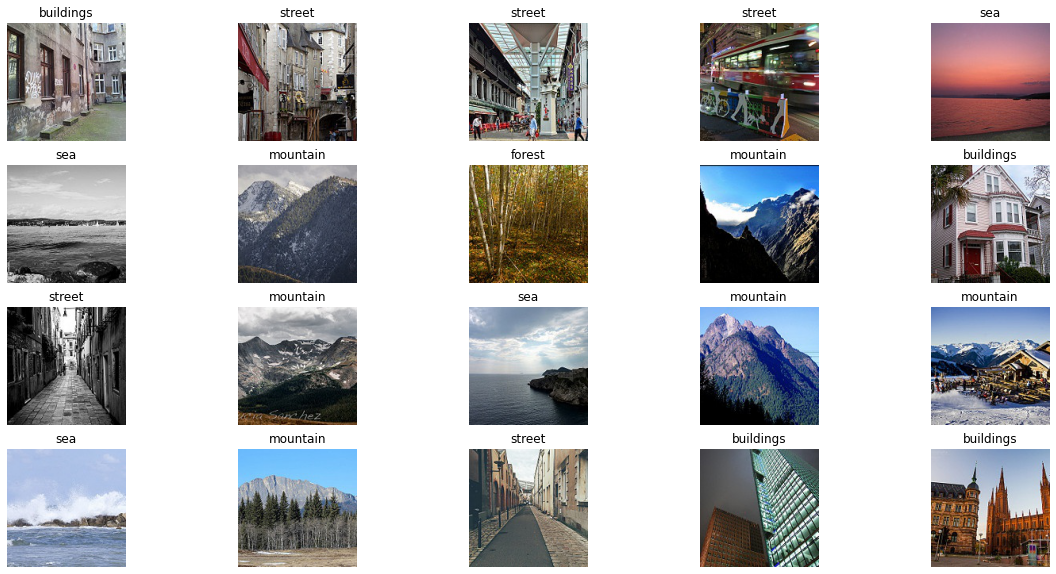

In [13]:
import random

#fungsi random 1 image
def one_random(target_path, target_class):
  target_fold = target_path + target_class
  random_image = random.sample(os.listdir(target_fold), 1)
  image = mpimg.imread(target_fold+'/'+random_image[0])
  plt.imshow(image)
  plt.title(target_class)
  plt.axis('off')
  print(f"Image shape {image.shape}")
  return image

#fungsi group random
def group_random(target_path, figure_size=(20,10), group=20):
  plt.figure(figsize=figure_size)
  for i in range(group):
    plt.subplot(4, 5, i+1)
    class_name = random.choice(['buildings', 'forest', 'mountain', 'sea', 'street'])
    image = one_random(target_path=target_path, target_class=class_name)

group_random = group_random(target_path='/content/data/seg_train/seg_train/')

**Proses perhitungan dari original dataset dan total setelah train dan validasi set**

In [14]:
train_path = '/content/data/seg_train/seg_train/'
test_path = '/content/data/seg_test/seg_test/'
folders_name = ['buildings', 'forest', 'mountain', 'sea', 'street']

train_files = {}
val_files = {}

for i in folders_name:
  train_files[i] = len(os.listdir(train_path+i)) #Cek panjang/banyak data train
  val_files[i] = len(os.listdir(test_path+i)) #Cek panjang/banyak data test

result_split = pd.DataFrame()
result_split = result_split.append(train_files, ignore_index=True)
result_split = result_split.append(val_files, ignore_index=True)
result_split['total'] = result_split.sum(axis=1)
result_split['type'] = ['train', 'val']
result_split = result_split[['type', 'buildings', 'forest', 'mountain', 'sea', 'street', 'total']]
print(result_split)

    type  buildings  forest  mountain     sea  street    total
0  train     2191.0  2271.0    2512.0  2274.0  2382.0  11630.0
1    val      437.0   474.0     525.0   510.0   501.0   2447.0


**Mendefinisikan directory untuk menyimpan train dan validation berdasarkan variabel**

In [15]:
train_set = '/content/data/seg_train/seg_train/'
val_set = '/content/data/seg_test/seg_test/'

**Proses Training dan Augmentasi image, dengan metode rescale, rotation, flip, maupun zoom**

In [16]:
train_augmentasi = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=30,
                            horizontal_flip=True,
                            zoom_range=0.2,
                            shear_range=0.2,
                            fill_mode = 'nearest')
validation_augmentasi = ImageDataGenerator(rescale=1./255)

**Train dan Validation data generator menggunakan batchsize dan metode categorical**

In [18]:
train_generator = train_augmentasi.flow_from_directory(
        train_set,
        target_size=(150, 150),
        batch_size=128,
        class_mode='categorical')
validation_generator = validation_augmentasi.flow_from_directory(
        val_set,
        target_size=(150, 150),
        batch_size=128,
        class_mode='categorical')

Found 11630 images belonging to 5 classes.
Found 2447 images belonging to 5 classes.


**Proses Modelling Sequential**

In [19]:
model = keras.Sequential([
      layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
      layers.MaxPooling2D(pool_size=(2, 2)),
      layers.Conv2D(64,(3,3), activation = 'relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Conv2D(128,(3,3), activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu'),
      layers.Dense(5, activation='softmax')
])

**Penggunaan Optimizer adam**

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Deklarasi Callbacks untuk membatasi akurasi ketika mencapai target**

In [21]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.85):
      self.model.stop_training = True
      print("\nValidation Accuracy dari model sudah >= 85%")
early_stop = myCallback()

**Mulai proses Training Model dengan model.fit**

In [23]:
history = model.fit(
    train_generator,
    epochs=40,
    steps_per_epoch=20,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=10,
    callbacks=[early_stop],
)

Epoch 1/40
20/20 [==============================] - 128s 6s/step - loss: 0.7687 - accuracy: 0.6984 - val_loss: 0.6997 - val_accuracy: 0.7258
Epoch 2/40
20/20 [==============================] - 128s 6s/step - loss: 0.7408 - accuracy: 0.7023 - val_loss: 0.6645 - val_accuracy: 0.7445
Epoch 3/40
20/20 [==============================] - 131s 7s/step - loss: 0.6714 - accuracy: 0.7359 - val_loss: 0.7716 - val_accuracy: 0.7078
Epoch 4/40
20/20 [==============================] - 129s 6s/step - loss: 0.6795 - accuracy: 0.7258 - val_loss: 0.6159 - val_accuracy: 0.7672
Epoch 5/40
20/20 [==============================] - 128s 6s/step - loss: 0.6514 - accuracy: 0.7434 - val_loss: 0.6023 - val_accuracy: 0.7695
Epoch 6/40
20/20 [==============================] - 128s 6s/step - loss: 0.6543 - accuracy: 0.7453 - val_loss: 0.5260 - val_accuracy: 0.7937
Epoch 7/40
20/20 [==============================] - 131s 7s/step - loss: 0.6073 - accuracy: 0.7684 - val_loss: 0.4895 - val_accuracy: 0.8094
Epoch 8/40
20

**Plotting Loss**


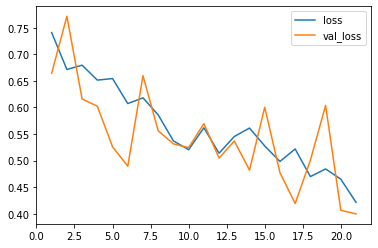

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
plt.show()

**Plotting Akurasi**

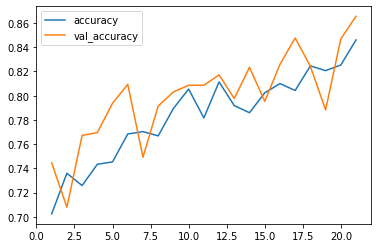

In [25]:
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [27]:
print(("\nBest Validation Loss: {:0.2f})" + "\nBest Validation Accuracy:{:0.2f}").format(history_df['val_loss'].min(), history_df['val_accuracy'].max()))


Best Validation Loss: 0.40)
Best Validation Accuracy:0.87


**Proses Konversi ke TFLite dan Download model.tflite**

In [28]:
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = convert.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmppfuvwp0o/assets


In [29]:
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>